<h1 id="Measuring-the-baseline-performance-of-the-implemented-&quot;Video-mics&quot;-variant">Measuring the baseline performance of the implemented "Video-mics" variant</h1>
<h2 id="Introduction">Introduction</h2>
<p>The starting point of this project was the algorithm specified by Madeo et al. (2016). This was a simplified version of &nbsp;Dieny et al. (2011) with the aim of improving on &nbsp;runtimes and resource needs. Additionally, findings of similar work &nbsp;in bioinformatics inspired stereo matching algorithms were&nbsp; also considered (Thevenon, Martinez-Del-Rincon, Dieny and J. C. Nebel, 2012; dos-Santos-Paulino, Nebel and Fl&oacute;rez-Revuelta, 2014; Kazantzidis <em>et al.</em>, 2018). However, the experimental setup of Madeo et al. greatly differed entailing hardware, software and parameter setup. &nbsp;Therefore the performance of this implementation had to be measured.</p>
<h2>Abstract</h2>
<p>A "Video-mics" variant was implemented based on the work of Madeo et al.(2016). It's performance was tested against the Middlebury 2003 dataset. While accuracy was behind of Madeo et al.'s, it was concluded to be sufficient enough to form the basis of further project work.</p>
<h2 id="Relevant-theory">Relevant theory</h2>
<h2 id="The-core-algorithm">The core algorithm</h2>
<p>The original algorithm (Madeo <em>et al.</em>, 2016) was intended to build upon the demonstrated the validity of applying bioinformatics in stereo vision (Thevenon, Martinez-Del-Rincon, Dieny and J.-C. Nebel, 2012). This was achieved by implementing a DNA sequence matching algorithm to the stereo matching pipeline. This was the Needleman and Wunch algorithm&nbsp; (Needleman and Wunsch, 1970).&nbsp;This algorithm belongs to the family of dynamic programming ones. DP is an optimisation method applicable to problems having overlapping subproblem and optimal substructure characteristics (Dreyfus, 2002).&nbsp;Applied to rectified stereo images, the original version performs disparity estimation scanline-wise. Using a modified matching function adapted from Needleman and Wunch&rsquo;s, each pixel in the left scanline is compared to the right scanline&rsquo;s ones. This is done in a left to right manner within one scanline. To determine the similarity between two pixels, a matching cost is computed<strong>.&nbsp;</strong>There are three constants used in this function: match, gap and egap. These constants can be mapped to three scenarios of stereo matching: match, occlusion and extended occlusion which are analogous to &ldquo;indels&rdquo; in DNA matching. Extended occlusion is when more than one pixel is occluded.&nbsp;</p>
<p>&nbsp;When two scanlines are examined, the matching cost for a pixel pair is computed as the maximum of matching costs computed from three directions:</p>
<p><strong>c<sub>i</sub> = Max (c<sub>diagonal</sub>, c<sub>top</sub>, c<sub>left</sub>)</strong></p>
<p>where &ldquo;C<sub>I</sub>&rdquo; is the cost for a pixel with the column index &ldquo;I&rdquo; within one scanline.</p>
<p>The maximum value of these three components is recorded into a cost matrix (C) or as it is referred to as by Dieny et al. (2011), &ldquo;score&rdquo; matrix which might be regarded as a more correct naming convention as in this case the greater the value the better the result is considered to be. Additionally, the maximum value&rsquo;s direction is recorded into a &ldquo;moves&rdquo; (M) matrix.</p>
<p>The costs are computed as the following:</p>
<ul>
<li>C<sub>diagonal</sub>: Aggregated cost from left diagonal plus match minus the absolute difference of the pixel intensities.<br /><strong>c<sub>diagonal</sub> = C[i-1, j-1] +&nbsp; match + |left[i] &ndash; right[j]|<br /></strong>&ldquo;LEFT&rdquo; and &ldquo;RIGHT&rdquo; are the left and right scanlines and &ldquo;I&rdquo; and &ldquo;J&rdquo; their corresponding pixel indices.</li>
</ul>
<ul>
<li>C<sub>top</sub>: Aggregated cost from the top pixel (entailing pixel in the right image not present in the left) plus gap/egap.<br /><strong>c<sub>top</sub> = C[i-1, j] +&nbsp; egap if M[i-1, j] == &ldquo;top&rdquo; else = C[i-1, j] +&nbsp; gap</strong></li>
</ul>
<ul>
<li>C<sub>left</sub>: Aggregated cost from the left pixel (entailing pixel in the left image not present in the right) plus gap/egap.<br /><strong>c<sub>left</sub> = = C[i, j-1] +&nbsp; egap if M[i, j-1] == &ldquo;left&rdquo; else = C[i, j-1] +&nbsp; gap</strong></li>
</ul>
<p>The matrix &ldquo;M&rdquo;, apart from during the process of backtracking, &nbsp;is also used to determine whether it is an extended gap or not. An extended gap scenario is such when the previous pixel&rsquo;s matching was also concluded as a gap or extended gap from the same direction. When the cost and &ldquo;moves&rdquo; matrices have been completed, backtracking ensues. This is an iterative process starting with locating the maximum score in the last column and row. Then, the coordinates are used in the &ldquo;moves&rdquo; matrix to determine which direction the maximum cost was aggregated from. This direction is recorded and the pointer is moved to the location encoded by the previously examined &ldquo;moves&rdquo; entry. This is repeated until the starting coordinates are reached. This is then used in reverse order to generate the disparity map.</p>
<p>When processing the generated path, directions can be &nbsp;interpreted (with regards to the left image) as the following:</p>
<ol>
<li>&ldquo;top&rdquo; direction means occlusion, a pixel intensity of 0 is inserted.</li>
<li>&ldquo;left&rdquo; movement entails increase in disparity.</li>
<li>&ldquo;diagonal&rdquo; movement results in the insertion of the running count of disparity at a given pixel (|n<sub>left</sub>-n<sub>tops</sub>|).</li>
</ol>
<p>The cost computation, direction and cost recording, backtracking and disparity generation is done for each scanline, as implied above.</p>
<h2 id="The-implemented-algorithm">The implemented algorithm</h2>
<p>The original algorithm devised by Dieny et al. (2011) involved additional operations. They used&nbsp; constraints (between neighbouring scanlines) which helped to determine which path to take if multiple alignments were possible. SIFT feature and Delaunay triangulation based parameter tuning was used to aid &nbsp;in finding optimal hyperparameters. Moreover, as a final step, a median filter was used to improve on the disparities. In a later work (Madeo <em>et al.</em>, 2016), it was established that the 32 constraints considered for multiple optimal paths&nbsp; did not contribute significantly to the reduction of disparity error. Additionally, neither the parameter tuning, nor median filtering used by Dieny. When multiple optimal paths were possible, Madeo&rsquo;s implementation did not perform any sort of heuristic approach to decide the best direction. Additionally, the effect of prioritising either one of the three directions were evaluated (left, top and diagonal) but no significant effect was reported. The conclusion was that there was no significant performance improvement when using one over another (typically discrepancies with the magnitude of 10<sup>-2</sup> were observed). Therefore, based on these observation, multiple path optimisation heuristics, parameter tuning and post-processing stages were not implemented. Another argument for the omittance of these steps was the small size of the starting dataset (Middlebury 2003). This, consisting of two images, was thought not to be able to provide a statistically founded arguments. However, more robust evaluation of like techniques employed in the pipeline was planned in the future.</p>
<h2 id="Method">Method</h2>
<p>Version 2 of the Middlebury Evaluation site used four sets for benchmarking. However, the only datasets used for this experiment were "Teddy", "Cones&rdquo;.&nbsp; The reason for this: &ldquo;Tsukaba&rdquo; and &ldquo;Venus&rdquo; were released as part of the 2001 dataset and this dataset was not yet captured with the level of detail the ensuing ones were done. For instance, the &ldquo;Tsukaba&rdquo; set has eight disparity levels.</p>
<p>In this experiment, the quarter-sized images of the selected release (2003) &nbsp;were converted to grayscale ones (computational feasibility) before the evaluation took place. This was presumed to result in an achieved accuracy lower than with &nbsp;coloured images by a factor of two. Madeo et al. (2016) reported 24.41% (occluded: 30.96%) 19.04% (occluded: 25.43%) errors when calculating the percentage of bad pixels whose error was greater than 1 pixel when it comes to scenes &ldquo;Teddy&rdquo; and &ldquo;Cones&rdquo; respectively.</p>
<p>The hyperparameters, namely, match, gap and egap were initialised to 60, -20, -1. These were not the values discussed in the aforementioned set of previous work, but were based on more recent but unpublished work suggested by Prof. J.C. Nebel, who was the co-author of every so-far-cited work (with the exception of Needleman and Wunch&rsquo;s).</p>
<p>It is also important to mention, that the&nbsp; stereo matching pipelines referenced above specified a matrix initialisation technique. This technique was of entering default values in&nbsp; the first column and row of the cost matrix. Every entry in these cells had the value of gap multiplied by its distance from the starting coordinate in the notebook: &ldquo;gap*col_index&rdquo;. However, after preliminary testing it resulted in mixed results. It worked well with smaller images but not with half and full sized ones. Therefore additional approaches were tested as part of this experiment.</p>
<p>These were:</p>
<ul>
<li>In line with the concept of extended gaps: the first index was initialised to the &ldquo;gap&rdquo; parameter&rsquo;s value, then every consecutive one was added the previous cell&rsquo;s value and &ldquo;egap&rdquo; (in the notebook: "default").</li>
<li>Every entry in the first row and column was initialised to the product of the number of columns and &ldquo;gap&rdquo; value (in the notebook: &ldquo;gap*col&rdquo;). This worked better for larger resolutions.</li>
</ul>
<p>For each scene, apart from bad metrics (with threshold values 2,4,8) &ndash; the selection of these tolerance values are explained in the notebook <a href="ALG_000_EXP_001_Metrics_validation.ipynb" target="_blank" rel="noopener">Metrics_validation_001</a>- absolute error, mean squared error, average error (equivalent to &ldquo;bad 0&rdquo;) and Eucledian distance (L2 distance) were also calculated. One of the reasons behind this multitude of metrics was to ensure future comparability to other datasets. Additionally, threshold metrics, such as &ldquo;Bad 2.0&rdquo; &nbsp;were thought to be not precise enough for measuring the accurate effects of changes in the pipeline as they might hide improvements/setbacks. Such could be the case when the improvement is less then the threshold value. Then the improvement would not be indicated. The results (including administrative attributes such as experiment id, image resolution and runtime as well) were recorded into a log file and generated disparities were also saved.</p>
<p>One intuitive hypothesis was also tested at the end of the experiment to guide further investigations. Namely, &nbsp;based on the visual analysis of disparities of previous work, it was thought that the parameter too high value of the parameter &ldquo;match&rdquo; was responsible for long horizontal lines with constant or relatively constant disparity values (so called &ldquo;streaking effect&rdquo; (Hirschmuller, 2008)). Therefore after the first test, informed by the visual analysis of the outputs,&nbsp; the &ldquo;match&rdquo; value was decreased in order to reduce the number of such artefacts. The decrease was done in two steps: first it was adjusted to the value of 40 and then to the value of 20.</p>
<h2 id="Results-and-discussion">Results and discussion</h2>
<p>In terms of quantitative results, the percentage of bad pixels (&ldquo;bad4&rdquo;, which due to the groundtruth&rsquo;s quarter pixel accuracy encoded as integer values is &ldquo;bad1&rdquo; in reality) were of 15% worse-off than the results reported by Madeo et al. (2016).</p>
<p>After visual analysis, it was established that even without the components and steps not implemented from the original algorithm, the generated disparity maps are recognisable and their quality is sufficient. The streaking effect (Hirschmuller, 2008), the results of lack of inter-scanline constraints in the pipeline were clearly observable. However, adjusting the &ldquo;match&rdquo; value, the effect&rsquo;s intensity lowered. This suggested a more subtle correlation between the streaking effect and inter-scanline constraints, namely, it was though that the value of &ldquo;match&rdquo; created a too high tolerance level for differences between pixels when calculating matching cost. This, in effect, was thought to have contributed to the large number of &nbsp;erroneous consecutive matches entailing constant disparity values. This theory &nbsp;was supported by the experienced 30% accuracy increase when using lower values (40 and 20). While admittedly, this does not prove the validity of such theory, it was though to be sufficient enough to provide grounds for further investigation into this.</p>
<p>When it comes to initialisation methods, the technique proposed by previous work was proved to be a justified direction to followed by a large margin. The application of other techniques bore &nbsp;almost totally erroneous results.</p>
<p>When it comes to runtimes (~10-15 minutes), it was concluded that further research into optimisation of the code and method was necessary to be undertaken&nbsp; as this was assumed to increase quadratically in proportion to growth in image dimensions when dealing with higher resolution or linearly, when dealing with larger datasets. &nbsp;would have resulted in unfeasible experiment times taking into account the length of the project.</p>
<h2 id="Conclusion">Conclusion</h2>
<p>After analysis of previous work, a custom pipeline was devised. This was benchmarked with a set of metrics on two scenes of the 2003 version of Middlebury Datasets. Both quantitative and visual analysis was performed, a satisfactory level of performance in terms of disparity estimation was achieved. Although, accuracy fell behind of previous works&rsquo;. A large amount of &nbsp;&nbsp;inter-scanline inconsistencies were observed (&ldquo;streaking effect&rdquo;) which were improved on by adjusting the parameter &ldquo;match&rdquo;&rsquo;s value. The explanation for this was assumed to be setting the &ldquo;match&rdquo; parameter too high posing a tolerance level detrimental to the accuracy of disparity maps. This theory was supported by lowering the occurrence of such artefacts by lowering the value of &ldquo;match&rdquo;. &nbsp;However, due to the small number of tests and intuitive parameter choice lacking theoretical substantiation,&nbsp; it could not be regarded as statistically proven. Further investigation was proposed into this matter. The pipeline&rsquo;s runtime ranged between 10-15 minutes. This was also regarded as a matter of further investigation so as to be able to conduct and effective further experimentation on larger datasets/images as well.</p>
<h2 id="References">References</h2>
<ol>
<li>dos-Santos-Paulino, A. C., Nebel, J.-C. and Fl&oacute;rez-Revuelta, F. (2014) &lsquo;Evolutionary Algorithm for Dense Pixel Matching in Presence of Distortions&rsquo;, in <em>Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)</em>, pp. 439&ndash;450. doi: 10.1007/978-3-662-45523-4_36.</li>
<li>Dreyfus, S. (2002) &lsquo;Richard Bellman on the Birth of Dynamic Programming&rsquo;, <em>Operations Research</em>, 50(1). doi: 10.1287/opre.50.1.48.17791.</li>
<li>Hirschmuller, H. (2008) &lsquo;Stereo Processing by Semiglobal Matching and Mutual Information&rsquo;, <em>IEEE Transactions on Pattern Analysis and Machine Intelligence</em>, 30(2), pp. 328&ndash;341. doi: 10.1109/TPAMI.2007.1166.</li>
<li>Kazantzidis, I. <em>et al.</em> (2018) &lsquo;Vide-omics: A genomics-inspired paradigm for video analysis&rsquo;, <em>Computer Vision and Image Understanding</em>. Elsevier, 166(November 2016), pp. 28&ndash;40. doi: 10.1016/j.cviu.2017.10.003.</li>
<li>Madeo, S. <em>et al.</em> (2016) &lsquo;An optimized stereo vision implementation for embedded systems: application to RGB and infra-red images&rsquo;, <em>Journal of Real-Time Image Processing</em>, 12(4), pp. 725&ndash;746. doi: 10.1007/s11554-014-0461-7.</li>
<li>Needleman, S. B. and Wunsch, C. D. (1970) &lsquo;A general method applicable to the search for similarities in the amino acid sequence of two proteins&rsquo;, <em>Journal of Molecular Biology</em>. Academic Press, 48(3), pp. 443&ndash;453. doi: 10.1016/0022-2836(70)90057-4.</li>
<li>Thevenon, J., Martinez-Del-Rincon, J., Dieny, R. and Nebel, J. C. (2012) &lsquo;Dense pixel matching between unrectified and distorted images using dynamic programming&rsquo;, <em>VISAPP 2012 - Proceedings of the International Conference on Computer Vision Theory and Applications</em>, 2, pp. 216&ndash;224. doi: 10.5220/0003812602160224.</li>
<li>Thevenon, J., Martinez-Del-Rincon, J., Dieny, R. and Nebel, J.-C. (2012) &lsquo;Dense pixel matching between unrectified and distorted images using dynamic programming&rsquo;, <em>Proceedings of the International Conference on Computer Vision Theory and Applications</em>, pp. 216&ndash;224.</li>
</ol>

In [1]:
###################################################################
# Built-in modules ################################################
###################################################################

import sys
import os
import numpy as np
import imp
import cv2
import os
import matplotlib.pyplot as plt
import gc
import math
import time
import glob

###################################################################
# Custom modules ##################################################
###################################################################

sys.path.append(os.path.join("..", ".."))

import project_helpers
from components.matchers.OriginalMatcher import Wrapper as m
from components.utils.SimpleProgressBar import SimpleProgressBar
from components.utils import utils as u
from components.utils import plot_utils as plu
from components.utils.CSVWriter2 import Wrapper as csv
from components.utils.Metrix import Wrapper as me

###################################################################
# Dataset specific modules#########################################
###################################################################

from components.utils import middlebury_utils as mbu


In [2]:
ROOT_PATH = os.path.join("..", "..")
EXPERIMENT_TITLE = "ALG_001-EXP_001-Baseline"

DATASET = "middlebury"

DATASET_FOLDER = os.path.join(ROOT_PATH, "datasets", DATASET)
LOG_FOLDER = os.path.join(ROOT_PATH, "experiments", "logs")
CSV_FILEPATH = os.path.join(LOG_FOLDER, EXPERIMENT_TITLE+".csv")
IMG_RES = "450X375"
PREPROCESSING_METHOD = "None"
KERNEL_SIZE = 1
KERNEL_SPEC = "None"

SCENES = ["teddy", "cones"]
SIZE=""
YEAR= 2003
EXP_PARAMS = dict()

#  Loading and displaying the dataset

..\..\datasets\middlebury\middlebury_2003\teddy
..\..\datasets\middlebury\middlebury_2003\teddy\im2.png
..\..\datasets\middlebury\middlebury_2003\teddy\im6.png
..\..\datasets\middlebury\middlebury_2003\teddy\disp2.png
..\..\datasets\middlebury\middlebury_2003\teddy\nonocc.png
..\..\datasets\middlebury\middlebury_2003\cones
..\..\datasets\middlebury\middlebury_2003\cones\im2.png
..\..\datasets\middlebury\middlebury_2003\cones\im6.png
..\..\datasets\middlebury\middlebury_2003\cones\disp2.png
..\..\datasets\middlebury\middlebury_2003\cones\nonocc.png


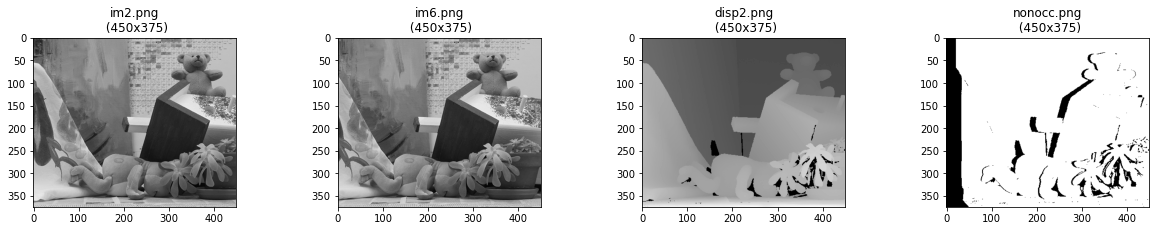

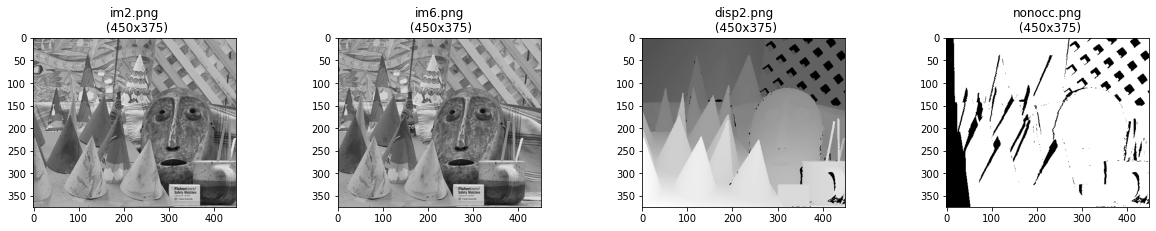

In [3]:
loaded_imgs_and_paths = list(mbu.get_images(DATASET_FOLDER, YEAR, scene, size=SIZE) for scene in SCENES)

for im, path in loaded_imgs_and_paths:
    filenames = list(os.path.split(p)[-1] for p in path)
    plu.plot_images(im, filenames)

# Benchmarking and evaluation

In [4]:
###################################################################
# Initialising hyperparameters and matcher#####################
###################################################################

csv_logger = csv(CSV_FILEPATH, default_header=False)
csv_logger.set_header_function(csv_logger.get_header_v3)
csv_logger.write_csv_header()
csv_logger.set_line_function(csv.format_stereo_matching_results_v2)

MATCH = 60
GAP = -20
EGAP = -1

SAVE_PATH  = os.path.join(ROOT_PATH, "experiments", "disparities", EXPERIMENT_TITLE)


EXP_PARAMS = {"experiment_id":EXPERIMENT_TITLE, "match": MATCH,"gap":GAP,"egap":EGAP,\
                  "algo":str(m.__module__), "init_method":"default","dataset":DATASET+SIZE,\
                  "preprocessing_method":"None","kernel_size":1,"kernel_spec":"None"}

In [ ]:
###################################################################
# Matching ########################################################
###################################################################

EXP_PARAMS = {"experiment_id":EXPERIMENT_TITLE, "match": MATCH,"gap":GAP,"egap":EGAP,\
                  "algo":str(m.__module__), "init_method":"default","dataset":DATASET+SIZE,\
                  "preprocessing_method":"None","kernel_size":1,"kernel_spec":"None"}
results = []
init_functions = [[m.fillUpFirstRows, "default"], [m.fillUpFirstRows2, "gap*col_index"], [m.fillUpFirstRows3, "gap*col"]]

for MATCH in range(20, 80,20):
    for init_function in init_functions:
        matcher = m(MATCH, GAP, EGAP, first_rows_fill_func = init_function[0])
        EXP_PARAMS["match"] = MATCH 
        EXP_PARAMS["init_method"] = init_function[1]
        for i, scene in enumerate(SCENES):
            
            EXP_PARAMS["scene"] = scene
            EXP_PARAMS["img_res"] = "{0}x{1}".format(loaded_imgs_and_paths[i][0][1].shape[1], loaded_imgs_and_paths[i][0][1].shape[0])  

            occ = loaded_imgs_and_paths[i][0][3]
            gt = loaded_imgs_and_paths[i][0][2]
            
            matcher.initialize(loaded_imgs_and_paths[i][0][0], loaded_imgs_and_paths[i][0][1])
            
            tic = time.time()
            matcher.alignImages()
            toc=time.time()
            
            ###################################################################
            # Saving image ####################################################
            ###################################################################
            EXP_PARAMS["runtime"] = toc-tic

            disp = matcher.lastDisparity
            disp = disp*4
            
            temp_path = u.save_disparity(SAVE_PATH, disp)
            
            results.append([disp, os.path.split(temp_path)[-1]])          
            
            ###################################################################
            # Benchmarking & logging ##########################################
            ###################################################################
            
            EXP_PARAMS["image_filename"] = temp_path

            EXP_PARAMS["are_occlusions_errors"] = ARE_OCCLUSIONS_ERRORS = False
            EXP_PARAMS["bad1"], EXP_PARAMS["bad2"], EXP_PARAMS["bad4"], EXP_PARAMS["bad8"], EXP_PARAMS["ABS_ERRor"], EXP_PARAMS["mse"], EXP_PARAMS["avg"], EXP_PARAMS["eucledian"] =\
            BAD1, BAD2, BAD4, BAD8, ABS_ERR, MSE, AVG, EUCLEDIAN = me.evaluate_over_all(disp, gt, occ, occlusions_counted_in_errors = ARE_OCCLUSIONS_ERRORS)

            csv_logger.append_new_sm_results(EXP_PARAMS, selected_keys=csv.get_header_v3())


            # Here the grountruth is passed as occlusion map in order to exclude the unknown areas (black)
            # from the calculation.
            EXP_PARAMS["are_occlusions_errors"] = True


            EXP_PARAMS["bad1"], EXP_PARAMS["bad2"], EXP_PARAMS["bad4"], EXP_PARAMS["bad8"], EXP_PARAMS["ABS_ERRor"], EXP_PARAMS["mse"], EXP_PARAMS["avg"], EXP_PARAMS["eucledian"] =\
            BAD1, BAD2, BAD4, BAD8, ABS_ERR, MSE, AVG, EUCLEDIAN = me.evaluate_over_all(disp, gt, gt, occlusions_counted_in_errors = ARE_OCCLUSIONS_ERRORS)

            csv_logger.append_new_sm_results(EXP_PARAMS, selected_keys=csv.get_header_v3())


### The  effects of different inifialisation methods and lower "match" value can be observed in the table below:

In [4]:
import pandas as pd
experiment_log = pd.read_csv(CSV_FILEPATH)
experiment_log.sort_values(by=["bad4","are_occlusions_errors"], inplace=True) 
experiment_log[["match", "init_method", "scene","are_occlusions_errors", "bad4", "runtime"]].head(36)

,match,init_method,scene,are_occlusions_errors,bad4,runtime
1,20,gap*col_index,cones,False,0.328676,1899.498052
2,40,gap*col_index,teddy,False,0.339178,1382.886276
4,20,gap*col_index,teddy,False,0.346486,1866.504103
0,60,gap*col_index,teddy,False,0.351362,1497.978872
3,40,gap*col_index,cones,False,0.359463,1456.726598
5,60,gap*col_index,cones,False,0.393570,1755.401367
8,20,gap*col_index,cones,True,0.404124,1899.498052
7,40,gap*col_index,teddy,True,0.407042,1382.886276
10,20,gap*col_index,teddy,True,0.413913,1866.504103
6,60,gap*col_index,teddy,True,0.417729,1497.978872


## The visual demonstration of different initialisation methods

As it is clearly visible from the plotted images below, only the "gap*col_index" initialisation method resulted in satisfactory results.

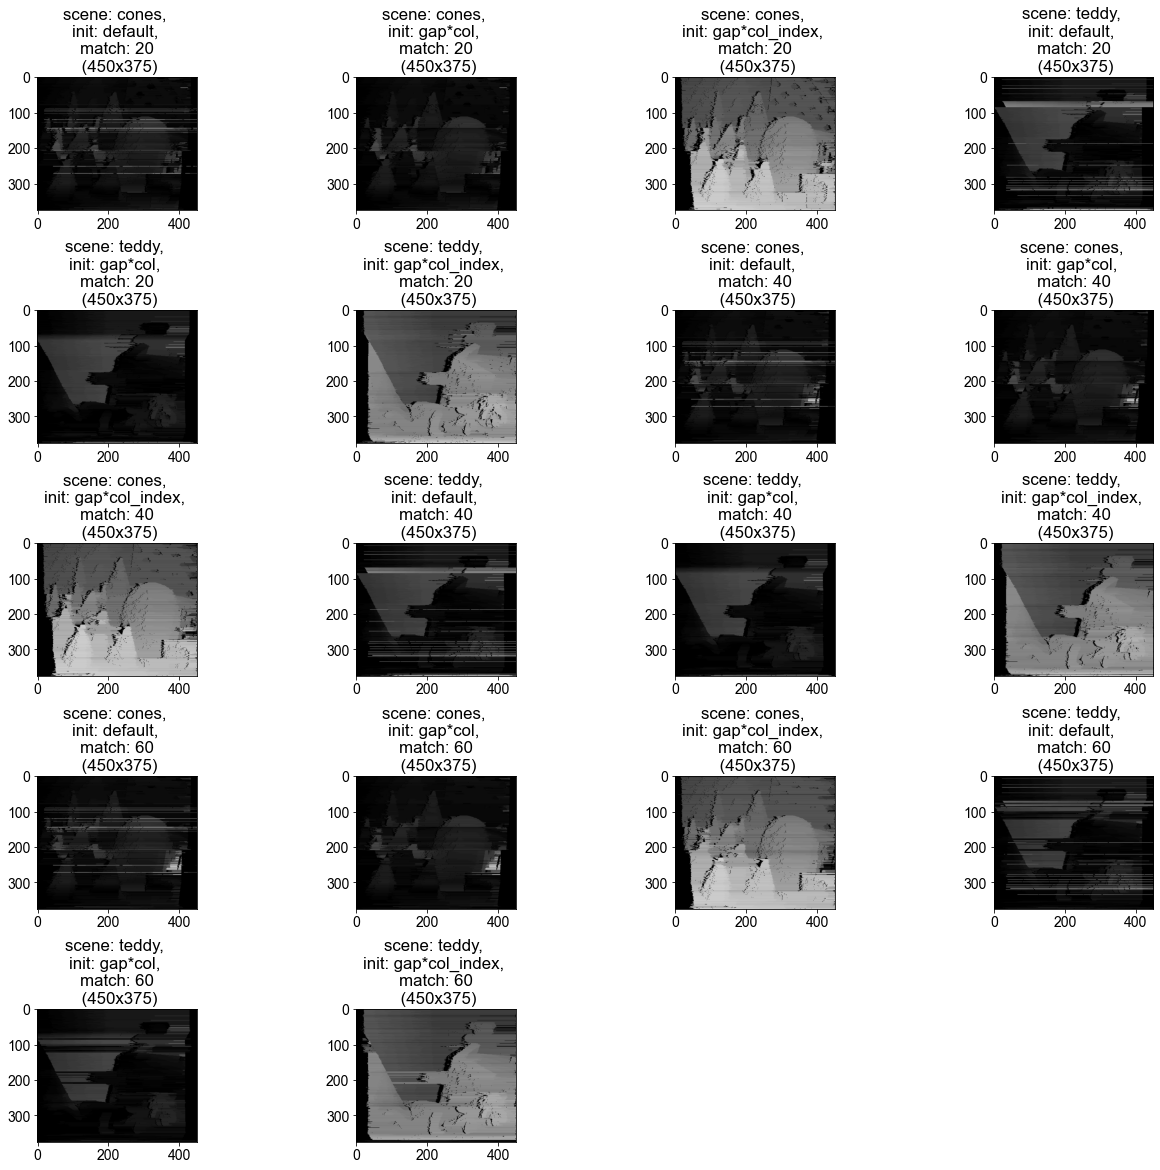

In [8]:
import matplotlib
image_reader_func = lambda filepath: cv2.imread(str(project_helpers.fix_win_rel_paths(filepath)))

filtered_log= experiment_log[experiment_log["are_occlusions_errors"] == False].sort_values(by=["match", "scene","init_method"])
filtered_log["loaded_imgs"] = [image_reader_func(filepath) for filepath in filtered_log["image_filename"]]
filtered_log["annotation"] = [("scene: {0}, \ninit: {1}, \nmatch: {2}".format(scene, init, m)) for scene, init, m in filtered_log[["scene", "init_method", "match"]].values]
filtered_log.sort_values(by=["match", "scene"], inplace=True)

font = {'family' : 'Arial',
        'size'   : 14}
matplotlib.rc('font', **font)

fig, axes = plu.plot_images(filtered_log["loaded_imgs"].values, filtered_log["annotation"].values, wspace=1)